# Project "The relationship between companies' stock prices and their internet presence"

## Data preparation

In [72]:
#Dependencies
#%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression

In [112]:
#Files to load 
stock_data_to_load = "Stock_data.csv"
google_trends_data_to_load = "Google_trends_data.csv"
twitter_data_to_load = "Twitter_data.csv"
news_data_to_load = "News_data.csv"

# Read the data
stock_data = pd.read_csv(stock_data_to_load)
google_trends_data = pd.read_csv(google_trends_data_to_load)
twitter_data = pd.read_csv(twitter_data_to_load)
news_data = pd.read_csv(news_data_to_load)


In [113]:
stock_data.head()

,date,open,high,low,close,volume,Company Name
0,2018-04-03,269.82,273.35,254.49,267.53,18844384,"Tesla, Inc."
1,2018-04-04,252.78,288.37,252.00,286.94,19896746,"Tesla, Inc."
2,2018-04-05,289.34,306.26,288.20,305.72,19121101,"Tesla, Inc."
3,2018-04-06,301.00,309.28,295.50,299.30,13520286,"Tesla, Inc."
4,2018-04-09,300.37,309.50,289.21,289.66,10249805,"Tesla, Inc."


In [114]:
stock_data = stock_data.rename(index=str, columns={"date": "Date"})
stock_data.head()

,Date,open,high,low,close,volume,Company Name
0,2018-04-03,269.82,273.35,254.49,267.53,18844384,"Tesla, Inc."
1,2018-04-04,252.78,288.37,252.00,286.94,19896746,"Tesla, Inc."
2,2018-04-05,289.34,306.26,288.20,305.72,19121101,"Tesla, Inc."
3,2018-04-06,301.00,309.28,295.50,299.30,13520286,"Tesla, Inc."
4,2018-04-09,300.37,309.50,289.21,289.66,10249805,"Tesla, Inc."


In [115]:
google_trends_data.head()

,date,Tesla,Netflix,Google,isPartial
0,2019-01-02,35,23,38,False
1,2019-01-03,15,26,41,False
2,2019-01-04,11,30,80,False
3,2019-01-05,10,39,34,False
4,2019-01-06,27,27,45,False


In [116]:
#Transform the data for merging
google_trends_data = pd.melt(google_trends_data, id_vars=["date"], 
                  var_name="Search Query", value_name="Popularity Rate")

In [117]:
google_trends_data.head()

,date,Search Query,Popularity Rate
0,2019-01-02,Tesla,35
1,2019-01-03,Tesla,15
2,2019-01-04,Tesla,11
3,2019-01-05,Tesla,10
4,2019-01-06,Tesla,27


In [118]:
google_trends_data["Company Name"] = ""
google_trends_data.loc[google_trends_data["Search Query"] == "Tesla", "Company Name"] = "Tesla, Inc."
google_trends_data.loc[google_trends_data["Search Query"] == "Google", "Company Name"] = "Google LLC"
google_trends_data.loc[google_trends_data["Search Query"] == "Netflix", "Company Name"] = "Netflix, Inc."

In [119]:
google_trends_data = google_trends_data.rename(index=str, columns={"date": "Date"})

In [120]:
google_trends_data.head()

,Date,Search Query,Popularity Rate,Company Name
0,2019-01-02,Tesla,35,"Tesla, Inc."
1,2019-01-03,Tesla,15,"Tesla, Inc."
2,2019-01-04,Tesla,11,"Tesla, Inc."
3,2019-01-05,Tesla,10,"Tesla, Inc."
4,2019-01-06,Tesla,27,"Tesla, Inc."


In [121]:
twitter_data.head()

,index,Date,Twitter Account,Total Tweets,Average Compound Score,Average Positive Score,Average Negative Score,Average Neutral Score,Total Retweets,Total Likes,Company Name
0,0,14-06-02,@reedhastings,1,0.5563,0.3100,0.000,0.6900,2,3,"Netflix, Inc."
1,1,14-08-06,@reedhastings,1,-0.4019,0.0000,0.114,0.8860,20,0,"Netflix, Inc."
2,2,14-08-24,@reedhastings,2,0.1806,0.1925,0.000,0.8075,32,0,"Netflix, Inc."
3,3,14-08-25,@reedhastings,1,0.8957,0.4050,0.074,0.5210,1,0,"Netflix, Inc."
4,4,14-08-26,@reedhastings,1,0.0000,0.0000,0.000,1.0000,191,0,"Netflix, Inc."


In [122]:
news_data.head()

,Date,Company Name,Total News (per day),Average Compound Score,Average Positive Score,Average Negative Score,Average Neutral Score
0,2019-03-02,"Tesla, Inc.",1,-0.962300,0.052000,0.534000,0.4140
1,2019-03-03,Google LLC,2,0.089150,0.057500,0.893000,0.0495
2,2019-03-04,Google LLC,1,-0.381800,0.000000,0.917000,0.0830
3,2019-03-06,"Tesla, Inc.",1,-0.051600,0.042000,0.911000,0.0470
4,2019-03-07,"Tesla, Inc.",3,0.809767,0.189667,0.810333,0.0000


In [220]:
# Combine the stock data and google trends into a single dataset
stock_vs_google_trends = pd.merge(stock_data, google_trends_data, on=["Date", "Company Name"], how="left")

In [221]:
#stock_vs_google_trends.reset_index(inplace=True)
stock_vs_google_trends.head()

,Date,open,high,low,close,volume,Company Name,Search Query,Popularity Rate
0,2018-04-03,269.82,273.35,254.49,267.53,18844384,"Tesla, Inc.",NaN,NaN
1,2018-04-04,252.78,288.37,252.00,286.94,19896746,"Tesla, Inc.",NaN,NaN
2,2018-04-05,289.34,306.26,288.20,305.72,19121101,"Tesla, Inc.",NaN,NaN
3,2018-04-06,301.00,309.28,295.50,299.30,13520286,"Tesla, Inc.",NaN,NaN
4,2018-04-09,300.37,309.50,289.21,289.66,10249805,"Tesla, Inc.",NaN,NaN


In [222]:
stock_vs_google_trends = stock_vs_google_trends.dropna()

In [223]:
stock_vs_google_trends.reset_index(inplace=True)

In [224]:
stock_vs_google_trends.head()

,index,Date,open,high,low,close,volume,Company Name,Search Query,Popularity Rate
0,189,2019-01-02,306.10,315.13,298.8000,310.12,11658648,"Tesla, Inc.",Tesla,35
1,190,2019-01-03,307.00,309.40,297.3800,300.36,6965184,"Tesla, Inc.",Tesla,15
2,191,2019-01-04,306.00,318.00,302.7300,317.69,7394116,"Tesla, Inc.",Tesla,11
3,192,2019-01-07,321.72,336.74,317.7508,334.96,7551225,"Tesla, Inc.",Tesla,17
4,193,2019-01-08,341.96,344.01,327.0200,335.35,7008516,"Tesla, Inc.",Tesla,10


In [225]:
stock_vs_google_trends.tail()

,index,Date,open,high,low,close,volume,Company Name,Search Query,Popularity Rate
178,747,2019-03-25,359.000,367.0399,357.44,366.23,8473845,"Netflix, Inc.",Netflix,40
179,748,2019-03-26,367.870,368.3800,358.02,359.97,7666475,"Netflix, Inc.",Netflix,30
180,749,2019-03-27,361.000,362.4700,350.37,353.37,7852370,"Netflix, Inc.",Netflix,7
181,750,2019-03-28,354.485,355.9400,349.20,354.61,4360960,"Netflix, Inc.",Netflix,15
182,751,2019-03-29,357.160,358.2500,353.71,356.56,4705636,"Netflix, Inc.",Netflix,8


## Visualization

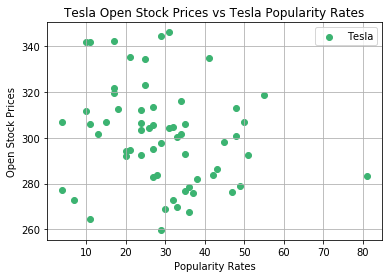

In [182]:
#Relationship between Open Stock Prices and Popularity Rate

tesla_x = stock_vs_google_trends.loc[stock_vs_google_trends["Search Query"] == "Tesla", "Popularity Rate"]
tesla_y = stock_vs_google_trends.loc[stock_vs_google_trends["Search Query"] == "Tesla", "open"]

tesla = plt.scatter(tesla_x, tesla_y, label='Tesla', c="#3CB371")

plt.title("Tesla Open Stock Prices vs Tesla Popularity Rates")
plt.xlabel("Popularity Rates")
plt.ylabel("Open Stock Prices")

plt.grid()

plt.legend()

plt.savefig("Images/Tesla_scatter.png", dpi = 400)

plt.show()

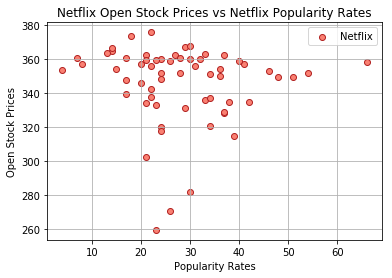

In [185]:
netflix_x = stock_vs_google_trends.loc[stock_vs_google_trends["Search Query"] == "Netflix", "Popularity Rate"]
netflix_y = stock_vs_google_trends.loc[stock_vs_google_trends["Search Query"] == "Netflix", "open"]

netflix = plt.scatter(netflix_x, netflix_y, label='Netflix', c="#FA8072", edgecolors="#B22222")

plt.title("Netflix Open Stock Prices vs Netflix Popularity Rates")
plt.xlabel("Popularity Rates")
plt.ylabel("Open Stock Prices")

plt.grid()

plt.legend()

plt.savefig("Images/Netflix_scatter.png", dpi = 400)

plt.show()

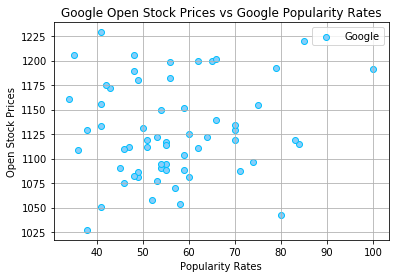

In [186]:
google_x = stock_vs_google_trends.loc[stock_vs_google_trends["Search Query"] == "Google", "Popularity Rate"]
google_y = stock_vs_google_trends.loc[stock_vs_google_trends["Search Query"] == "Google", "open"]


google = plt.scatter(google_x, google_y, label='Google', c="#87CEFA", edgecolors="#00BFFF")

plt.title("Google Open Stock Prices vs Google Popularity Rates")
plt.xlabel("Popularity Rates")
plt.ylabel("Open Stock Prices")

plt.grid()

plt.legend()

plt.savefig("Images/Google_scatter.png", dpi = 400)

plt.show()

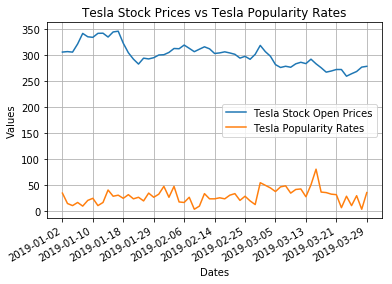

In [229]:
tesla_stock_x = stock_vs_google_trends.loc[stock_vs_google_trends["Search Query"] == "Tesla", "Date"]
tesla_stock_y = stock_vs_google_trends.loc[stock_vs_google_trends["Search Query"] == "Tesla", "open"]

tesla_google_trends_x = stock_vs_google_trends.loc[stock_vs_google_trends["Search Query"] == "Tesla", "Date"]
tesla_google_trends_y = stock_vs_google_trends.loc[stock_vs_google_trends["Search Query"] == "Tesla", "Popularity Rate"]


fig, ax = plt.subplots()

tesla_stock, = ax.plot(tesla_stock_x, tesla_stock_y, label='Tesla Stock Open Prices')
tesla_google_trends, = ax.plot(tesla_google_trends_x, tesla_google_trends_y, label='Tesla Popularity Rates')

ax.set(xlabel='Dates', ylabel='Values',
       title='Tesla Stock Prices vs Tesla Popularity Rates')

ax.xaxis.set_major_locator(plt.MaxNLocator(12))

ax.grid()

ax.legend()

fig.autofmt_xdate()

plt.savefig("Images/Tesla_lines.png", dpi = 400)

plt.show()

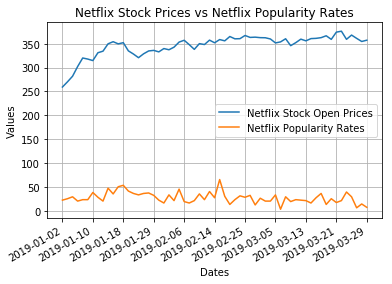

In [230]:
netflix_stock_x = stock_vs_google_trends.loc[stock_vs_google_trends["Search Query"] == "Netflix", "Date"]
netflix_stock_y = stock_vs_google_trends.loc[stock_vs_google_trends["Search Query"] == "Netflix", "open"]

netflix_google_trends_x = stock_vs_google_trends.loc[stock_vs_google_trends["Search Query"] == "Netflix", "Date"]
netflix_google_trends_y = stock_vs_google_trends.loc[stock_vs_google_trends["Search Query"] == "Netflix", "Popularity Rate"]

fig, ax = plt.subplots()

netflix_stock, = ax.plot(netflix_stock_x, netflix_stock_y, label='Netflix Stock Open Prices')
netflix_google_trends, = ax.plot(netflix_google_trends_x, netflix_google_trends_y, label='Netflix Popularity Rates')

ax.set(xlabel='Dates', ylabel='Values',
       title='Netflix Stock Prices vs Netflix Popularity Rates')

ax.xaxis.set_major_locator(plt.MaxNLocator(12))

ax.grid()

ax.legend()

fig.autofmt_xdate()

plt.savefig("Images/Netflix_lines.png", dpi = 400)

plt.show()

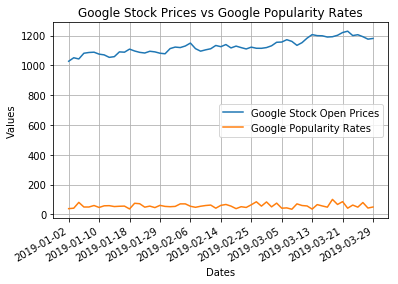

In [231]:
google_stock_x = stock_vs_google_trends.loc[stock_vs_google_trends["Search Query"] == "Google", "Date"]
google_stock_y = stock_vs_google_trends.loc[stock_vs_google_trends["Search Query"] == "Google", "open"]

google_comp_trends_x = stock_vs_google_trends.loc[stock_vs_google_trends["Search Query"] == "Google", "Date"]
google_comp_trends_y = stock_vs_google_trends.loc[stock_vs_google_trends["Search Query"] == "Google", "Popularity Rate"]

fig, ax = plt.subplots()

google_stock, = ax.plot(google_stock_x, google_stock_y, label='Google Stock Open Prices')
google_comp_trends, = ax.plot(google_comp_trends_x, google_comp_trends_y, label='Google Popularity Rates')

ax.set(xlabel='Dates', ylabel='Values',
       title='Google Stock Prices vs Google Popularity Rates')

ax.xaxis.set_major_locator(plt.MaxNLocator(12))

ax.grid()

ax.legend()

fig.autofmt_xdate()

plt.savefig("Images/Google_lines.png", dpi = 400)

plt.show()

## Statistics

In [154]:
# Combine the data into a single dataset (outer join)

df_step_1 = pd.merge(stock_data, google_trends_data, on=["Date", "Company Name"], how="outer")

df_step_2 = pd.merge(df_step_1, twitter_data, on=["Date", "Company Name"], how="outer")

combined_data_outer_join = pd.merge(df_step_2, news_data, on=["Date", "Company Name"], how="outer", suffixes=('', '_news'))


In [155]:
combined_data_outer_join

,Date,open,high,low,close,volume,Company Name,Search Query,Popularity Rate,index,...,Average Positive Score,Average Negative Score,Average Neutral Score,Total Retweets,Total Likes,Total News (per day),Average Compound Score_news,Average Positive Score_news,Average Negative Score_news,Average Neutral Score_news
0,2018-04-03,269.8200,273.3500,254.4900,267.530,18844384.0,"Tesla, Inc.",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-04-04,252.7800,288.3700,252.0000,286.940,19896746.0,"Tesla, Inc.",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-04-05,289.3400,306.2600,288.2000,305.720,19121101.0,"Tesla, Inc.",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-04-06,301.0000,309.2800,295.5000,299.300,13520286.0,"Tesla, Inc.",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-04-09,300.3700,309.5000,289.2100,289.660,10249805.0,"Tesla, Inc.",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2018-04-10,298.9700,307.1000,293.6800,304.700,11024259.0,"Tesla, Inc.",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2018-04-11,300.7403,308.9800,299.6600,300.930,7482945.0,"Tesla, Inc.",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2018-04-12,302.3200,303.9500,293.6800,294.080,7608769.0,"Tesla, Inc.",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2018-04-13,303.6000,303.9499,295.9800,300.340,7327223.0,"Tesla, Inc.",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2018-04-16,299.0000,299.6600,289.0100,291.210,6338488.0,"Tesla, Inc.",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
# Combine the stock data and news data into a single dataset

stock_news_data = pd.merge(stock_data, news_data, on=["Date", "Company Name"], how="inner")


In [140]:
stock_news_data

,Date,open,high,low,close,volume,Company Name,Total News (per day),Average Compound Score,Average Positive Score,Average Negative Score,Average Neutral Score
0,2019-03-06,276.48,281.5058,274.3900,276.24,10335485,"Tesla, Inc.",1,-0.051600,0.042000,0.911000,0.047000
1,2019-03-07,278.84,284.7000,274.2500,276.59,9442483,"Tesla, Inc.",3,0.809767,0.189667,0.810333,0.000000
2,2019-03-11,283.52,291.2800,280.5000,290.92,7392278,"Tesla, Inc.",3,0.224367,0.035333,0.964667,0.000000
3,2019-03-15,283.51,283.7244,274.4000,275.43,14785531,"Tesla, Inc.",2,0.051250,0.090000,0.833000,0.076500
4,2019-03-18,276.00,278.0500,267.3000,269.49,10280980,"Tesla, Inc.",2,0.179150,0.145000,0.830500,0.024500
5,2019-03-21,272.60,276.4500,268.4500,274.02,5947098,"Tesla, Inc.",2,-0.113150,0.029500,0.898500,0.072000
6,2019-03-25,259.71,263.1800,254.4600,260.42,10215029,"Tesla, Inc.",2,0.044500,0.058000,0.912000,0.030000
7,2019-03-27,268.75,275.3700,268.1838,274.83,8779166,"Tesla, Inc.",4,-0.127450,0.011000,0.919500,0.069500
8,2019-03-04,1154.56,1165.5200,1138.2500,1153.42,1774467,Google LLC,1,-0.381800,0.000000,0.917000,0.083000
9,2019-03-12,1182.30,1205.7100,1182.3000,1197.25,2110979,Google LLC,2,0.560900,0.116000,0.861000,0.023000


In [143]:
tesla_stock_news = stock_news_data.loc[stock_news_data["Company Name"] == "Tesla, Inc.", ["Date", "open", "Total News (per day)", "Average Positive Score", "Average Negative Score", "Average Neutral Score"]]

In [144]:
tesla_stock_news

,Date,open,Total News (per day),Average Positive Score,Average Negative Score,Average Neutral Score
0,2019-03-06,276.48,1,0.042000,0.911000,0.0470
1,2019-03-07,278.84,3,0.189667,0.810333,0.0000
2,2019-03-11,283.52,3,0.035333,0.964667,0.0000
3,2019-03-15,283.51,2,0.090000,0.833000,0.0765
4,2019-03-18,276.00,2,0.145000,0.830500,0.0245
5,2019-03-21,272.60,2,0.029500,0.898500,0.0720
6,2019-03-25,259.71,2,0.058000,0.912000,0.0300
7,2019-03-27,268.75,4,0.011000,0.919500,0.0695


In [77]:
#Linear regression

In [147]:
#For Tesla 
X = tesla_stock_news.drop(['open', 'Date'], axis=1)
y = tesla_stock_news['open']

# X = stock_vs_google_trends.loc[stock_vs_google_trends["Search Query"] == "Tesla", "Popularity Rate"]
# y = stock_vs_google_trends.loc[stock_vs_google_trends["Search Query"] == "Tesla", "open"]


In [148]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [149]:
print('R^2: {0}'.format(model.score(X, y)))

R^2: 0.3757531803226846


In [150]:
coef = pd.DataFrame(list(zip(['intercept'] + X.columns.tolist(), [model.intercept_] + model.coef_.tolist())),
                    columns=['predictor', 'coef'])
coef

,predictor,coef
0,intercept,30917.796214
1,Total News (per day),0.115526
2,Average Positive Score,-30643.370749
3,Average Negative Score,-30639.620198
4,Average Neutral Score,-30768.761743
